# Classification Task: Predicting Diabetes Risk

## Objective
The goal of this notebook is to predict whether a person has diabetes using patient health metrics. This task demonstrates:
1. How to preprocess and explore a dataset for classification tasks.
2. Building and evaluating machine learning models like **Logistic Regression**, **Random Forest**, and **Support Vector Machine (SVM)**.
3. The importance of feature selection and scaling for model performance.
4. Comparing model performance using metrics like accuracy, precision, recall, and F1-score.

## Tools and Techniques
- **Python Libraries:** pandas, numpy, matplotlib, seaborn, scikit-learn.
- **Models:** Logistic Regression, Random Forest, SVM.
- **Evaluation Metrics:** Confusion Matrix, ROC Curve, Precision-Recall Curve.



# Dataset Overview

## Source
The dataset used is the **Pima Indians Diabetes Dataset**, sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/diabetes). It contains health metrics and diabetes status for individuals.

### Features
| Feature Name              | Description                               | Type    |
|---------------------------|-------------------------------------------|---------|
| Pregnancies               | Number of pregnancies                    | Numeric |
| Glucose                   | Plasma glucose concentration (mg/dL)     | Numeric |
| BloodPressure             | Diastolic blood pressure (mm Hg)         | Numeric |
| SkinThickness             | Triceps skinfold thickness (mm)          | Numeric |
| Insulin                   | 2-hour serum insulin (mu U/ml)           | Numeric |
| BMI                       | Body Mass Index (kg/m²)                  | Numeric |
| DiabetesPedigreeFunction  | Diabetes pedigree function               | Numeric |
| Age                       | Age (years)                              | Numeric |
| Outcome                   | Diabetes status (1=Positive, 0=Negative) | Target  |

## Dataset Characteristics
- **Type:** Classification task.
- **Samples:** 768 individuals.
- **Classes:** Binary (1 = Diabetes, 0 = No Diabetes).


# Loading Dataset and Initial Inspection

## Overview:
- Import necessary libraries for data manipulation, visualization, and machine learning tasks.
- Load the Pima Indians Diabetes dataset from a URL.
- Assign column names to make the dataset readable.
- Perform an initial inspection to understand its structure and identify potential issues.

### Steps:
1. **Preview Data:** Display the first few rows to verify the dataset structure.
2. **Dataset Information:** Use `df.info()` to check column data types and identify missing values.
3. **Summary Statistics:** Use `df.describe()` to understand the range and central tendencies of numeric features.


In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
    "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv(url, names=columns)

# Display the first few rows
print("Dataset Preview:")
df.head()

Dataset Preview:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check dataset info
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Exploration

## Objective
Explore the dataset to understand feature distributions, detect missing or anomalous values, and identify relationships between features and the target variable (`Outcome`).

### Key Questions
1. Are there any missing or zero values that need handling?
2. What are the distributions of numerical features like `Glucose` and `BMI`?
3. How are the features correlated?


# Visualizing Pairwise Relationships

## Overview:
- Explore the relationships between features and the target variable (`Outcome`) through visualizations.

### Steps:
1. **Zero Values Check:** Identify columns with biologically improbable zero values (e.g., no blood pressure or glucose levels).
2. **Pairplot:** Visualize pairwise relationships between features and group data by `Outcome`. This helps in identifying patterns or feature separability.
3. **Correlation Heatmap:** Plot a heatmap to quantify relationships between features and the target. Strong correlations help in feature selection.
4. **Feature Distributions:** Use histograms to visualize the value ranges and distributions for each feature.


In [5]:
# Check for missing or zero values
print("Zero values in each column:")
print((df == 0).sum())

Zero values in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


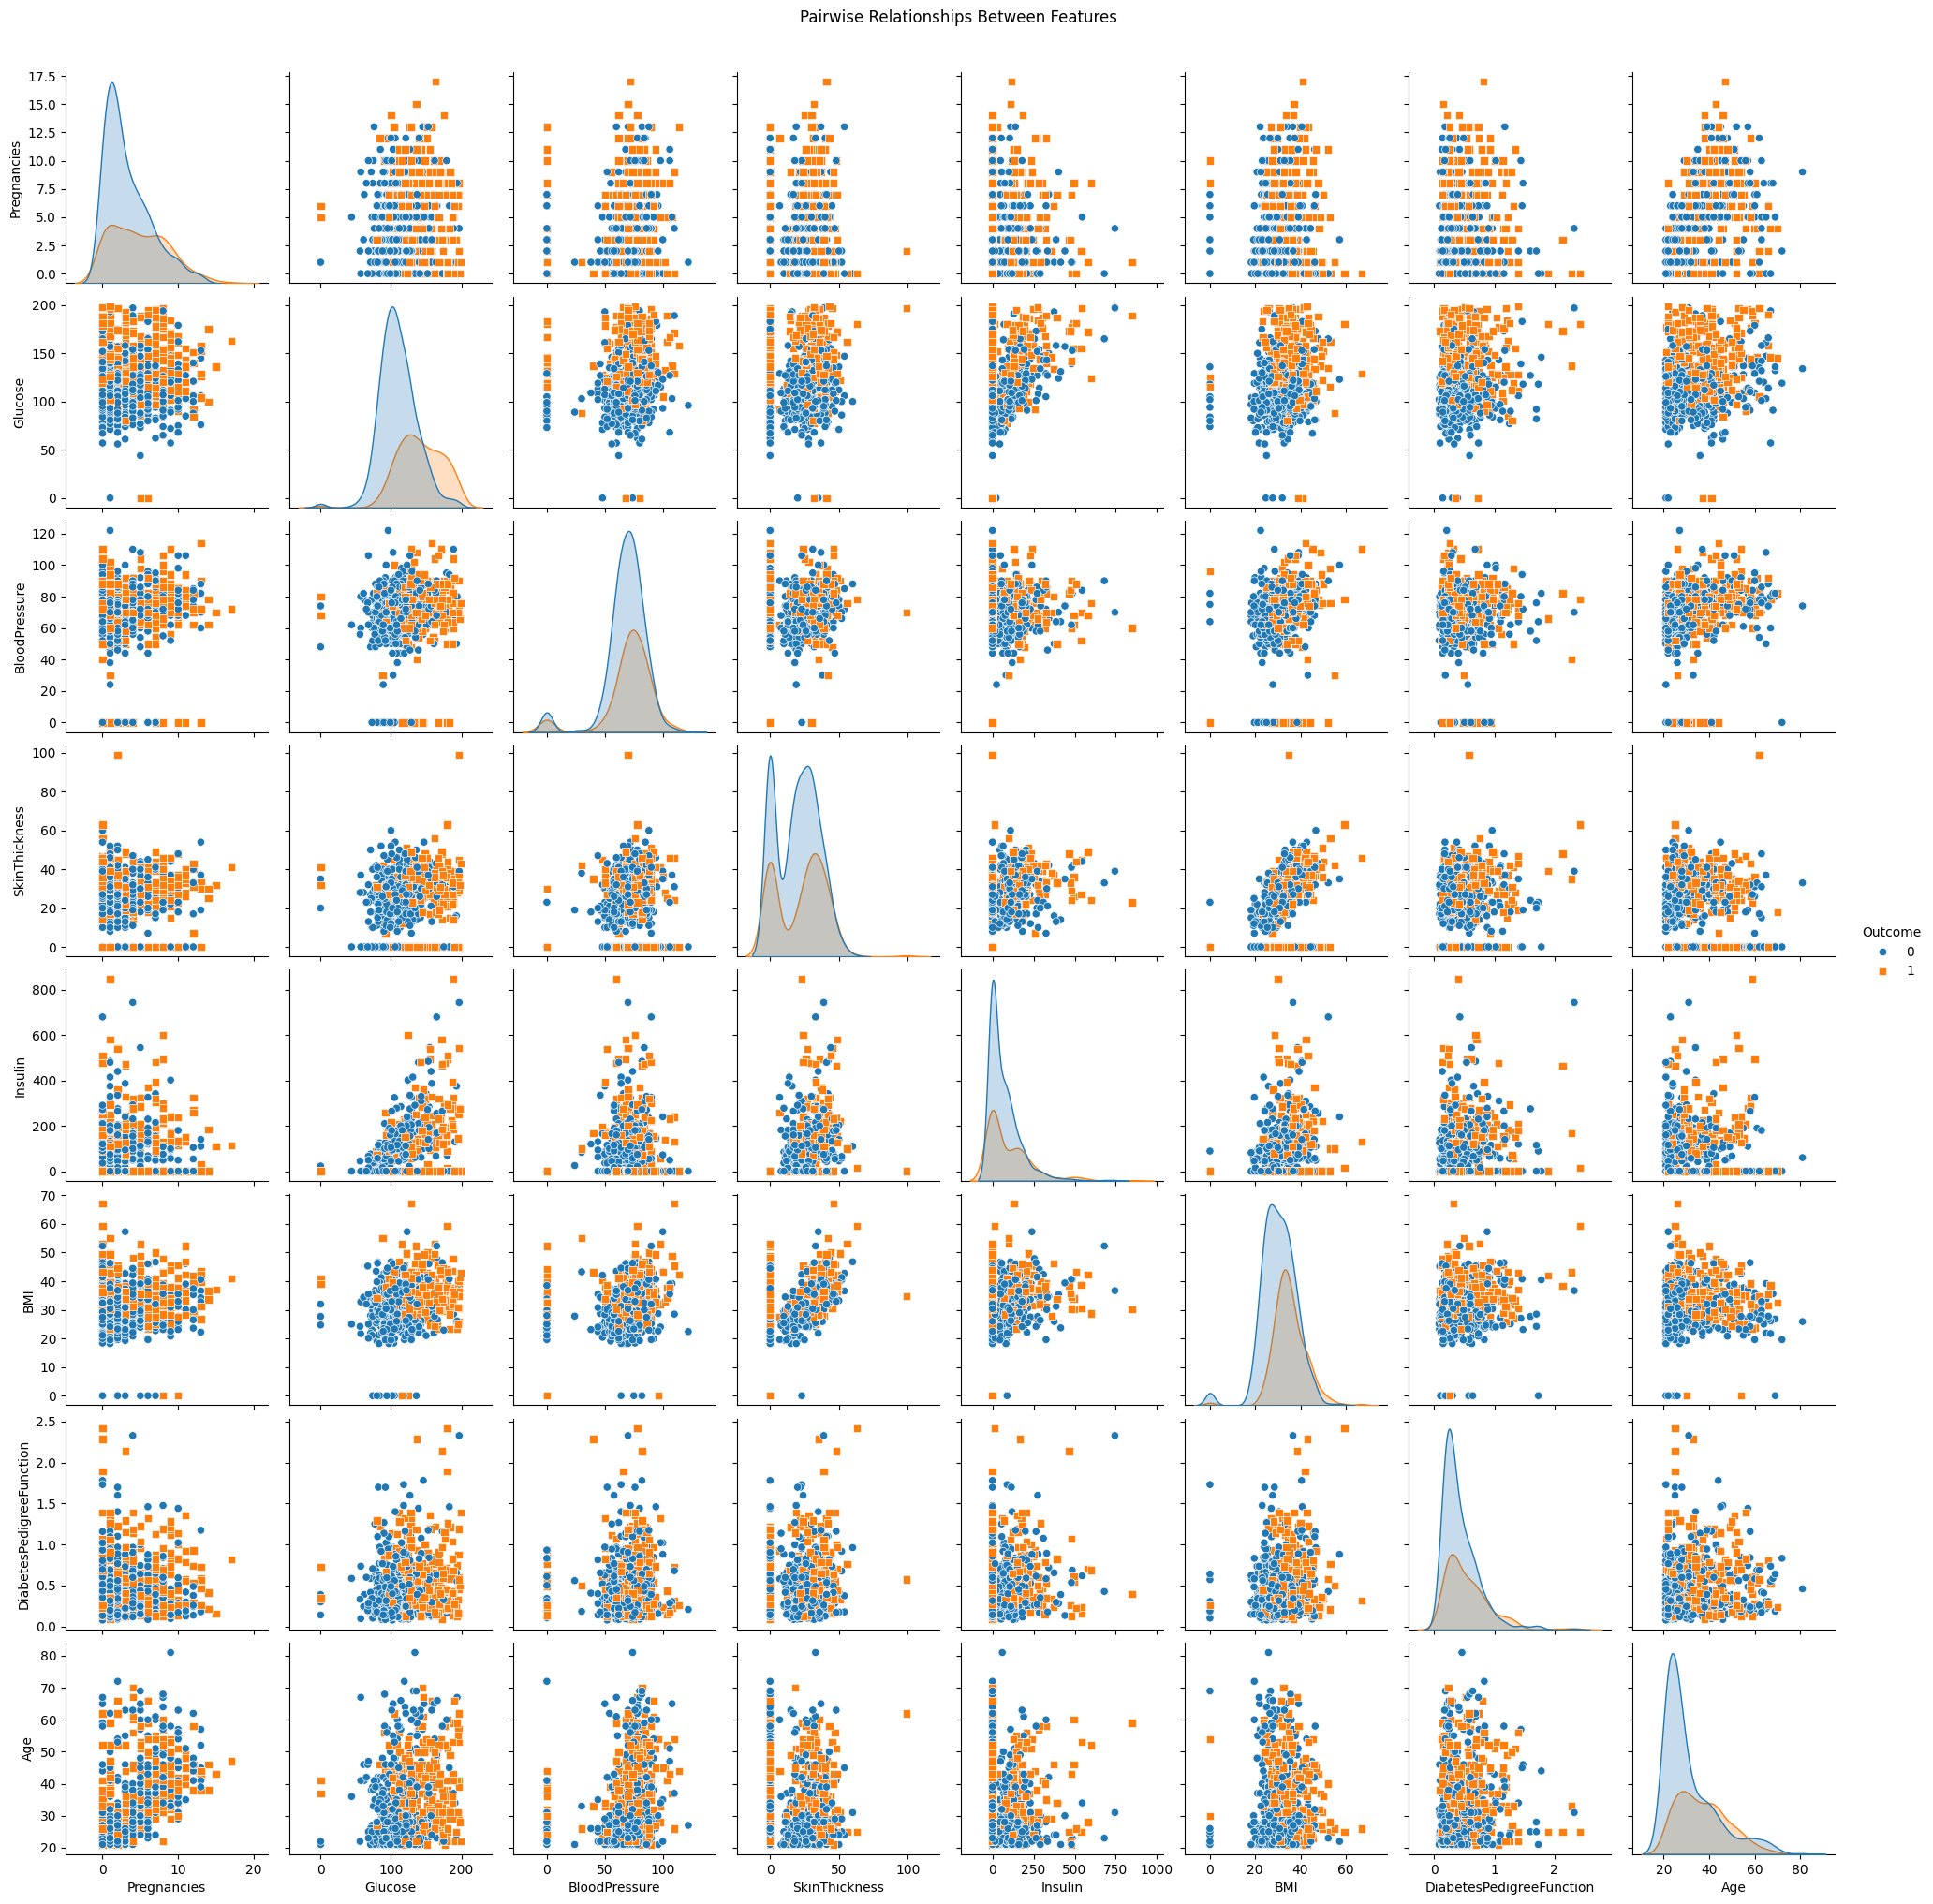

In [6]:
# Pairwise relationships
sns.pairplot(df, hue="Outcome", diag_kind='kde', markers=["o", "s"])
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

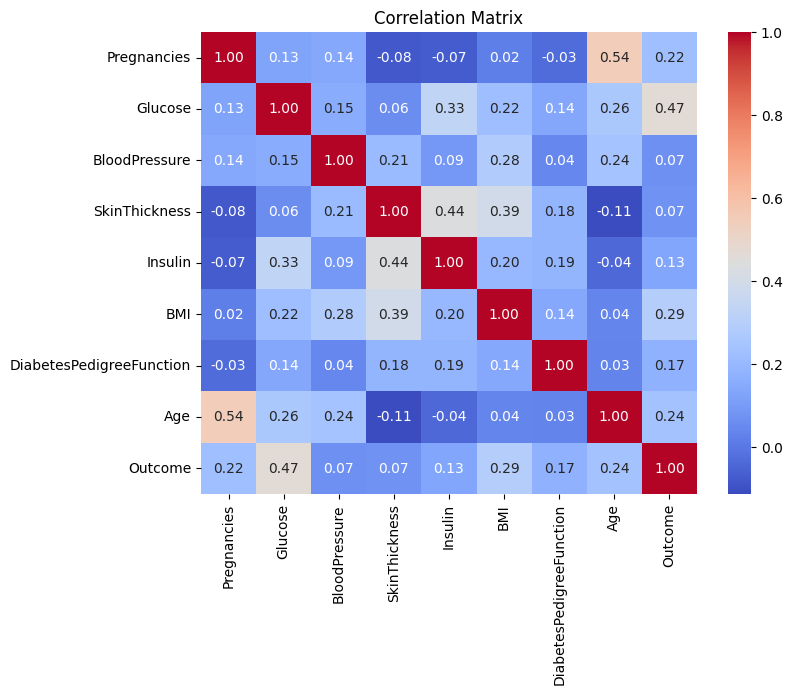

In [9]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

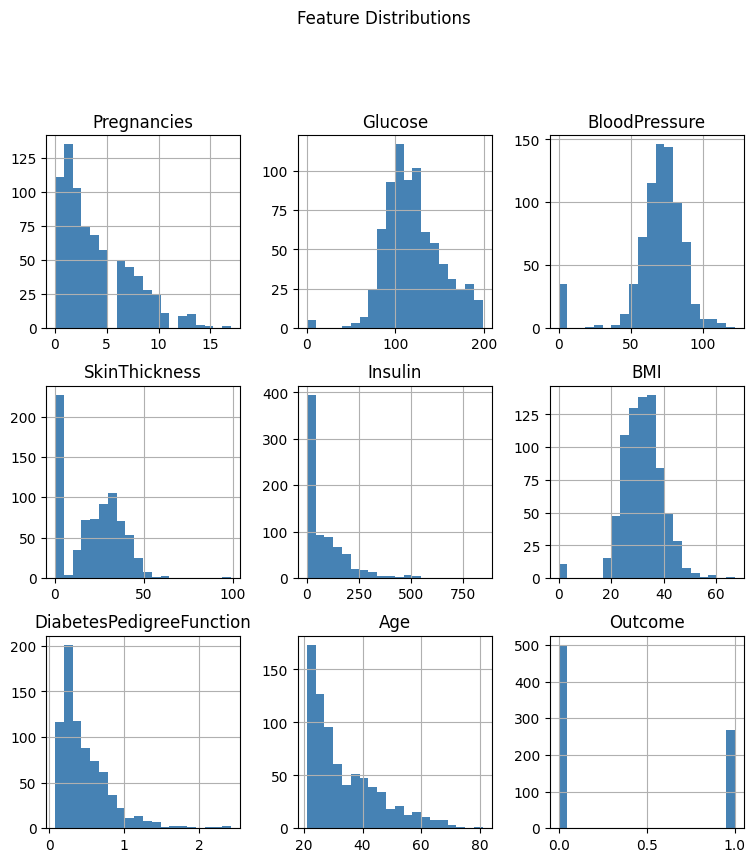

In [13]:
# Distribution of features
df.hist(bins=20, figsize=(9, 9), color="steelblue")
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Data Preprocessing

## Handling Missing or Zero Values
Many features, such as `Glucose`, `BloodPressure`, and `BMI`, have zero values which are biologically improbable. These zeros will be replaced with the **median** of the respective column.

## Splitting the Data
The dataset is split into:
1. **Features (X):** All columns except `Outcome`.
2. **Target (y):** The `Outcome` column.

## Scaling
Features are scaled using **StandardScaler** to normalize the range of values, especially for models like SVM.


# Handling Missing or Zero Values

## Overview:
- Replace zero values in specific columns with the column’s **median** to maintain realistic data while minimizing bias.

### Steps:
1. Identify columns with biologically improbable zeros (`Glucose`, `BloodPressure`, etc.).
2. Replace zeros using `df[col].replace(0, median)` for each relevant column.


In [14]:
# Replace zero values with column medians
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_with_zeros:
    df[col] = df[col].replace(0, df[col].median())


# Splitting the Data

## Overview:
- Prepare the dataset for model training and evaluation by splitting it into training and test sets.
- Normalize features to ensure models handle features with different scales effectively.

### Steps:
1. **Feature and Target Separation:**
   - `X`: Contains all input features.
   - `y`: Contains the target variable (`Outcome`).
2. **Train-Test Split:**
   - Split the dataset into training (80%) and test (20%) sets using `train_test_split`.
   - Use `stratify=y` to ensure consistent class distribution across splits.
3. **Feature Scaling:**
   - Standardize the data using `StandardScaler` to give all features a mean of 0 and a standard deviation of 1.
   - Scaling is especially critical for models like SVM.


In [15]:
# Split data into features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [16]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

## Logistic Regression
A baseline model for binary classification.

## Random Forest
An ensemble learning method that combines decision trees for robust classification.

## Support Vector Machine (SVM)
A powerful algorithm for linear and non-linear classification.

### Steps
1. Train each model on the training data.
2. Evaluate performance using metrics like accuracy, precision, recall, and F1-score.
3. Visualize confusion matrices and ROC curves.


# Logistic Regression Training

## Overview:
- Train a baseline logistic regression model on the preprocessed data.
- Logistic regression is a linear model that predicts probabilities of each class and assigns labels based on the highest probability.

### Steps:
1. **Model Initialization:** Create a logistic regression model with `random_state=42` for reproducibility.
2. **Model Training:** Fit the model to the training data (`X_train` and `y_train`).
3. **Predictions:** Use the trained model to predict test set labels (`y_pred_lr`).


In [17]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Training

## Overview:
- Train a Random Forest classifier, an ensemble method that combines multiple decision trees for robust predictions.

### Steps:
1. **Model Initialization:**
   - Create a Random Forest model with `n_estimators=100` (number of trees in the forest).
   - Set `random_state=42` for reproducibility.
2. **Model Training:** Fit the Random Forest model to the training data.
3. **Predictions:** Use the trained model to predict test set labels (`y_pred_rf`).


In [18]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SVM Training

## Overview:
- Train a Support Vector Machine (SVM), which finds an optimal hyperplane for separating data points in a high-dimensional space.

### Steps:
1. **Model Initialization:**
   - Create an SVM model with `probability=True` to enable probability estimates for ROC curve plotting.
   - Set `random_state=42` for reproducibility.
2. **Model Training:** Fit the SVM model to the training data.
3. **Predictions:** Use the trained model to predict test set labels (`y_pred_svm`).


In [19]:
# SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluating Models with Metrics

## Overview:
- Evaluate each model’s performance using standard classification metrics like accuracy, precision, recall, and F1-score.

### Steps:
1. **Classification Reports:**
   - Generate detailed classification reports for Logistic Regression, Random Forest, and SVM models.
   - The report includes metrics for each class and overall model performance.
2. **Confusion Matrices:**
   - Visualize confusion matrices to understand true positives, false positives, true negatives, and false negatives.
3. **ROC Curves:**
   - Plot Receiver Operating Characteristic (ROC) curves for all models to compare their ability to differentiate between classes.
   - Calculate and display the Area Under the Curve (AUC) for each model.


In [20]:
# Classification Reports
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("\nSVM:")
print(classification_report(y_test, y_pred_svm))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154


SVM:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.

# Visualizing Model Performance

## Overview:
- Use visualizations to compare the performance of different models on the test set.

### Steps:
1. **Confusion Matrices:**
   - Plot confusion matrices for Logistic Regression, Random Forest, and SVM models.
   - Understand where each model performs well and where it struggles.
2. **ROC Curves:**
   - Plot ROC curves for each model.
   - Compare AUC scores to assess overall model effectiveness.


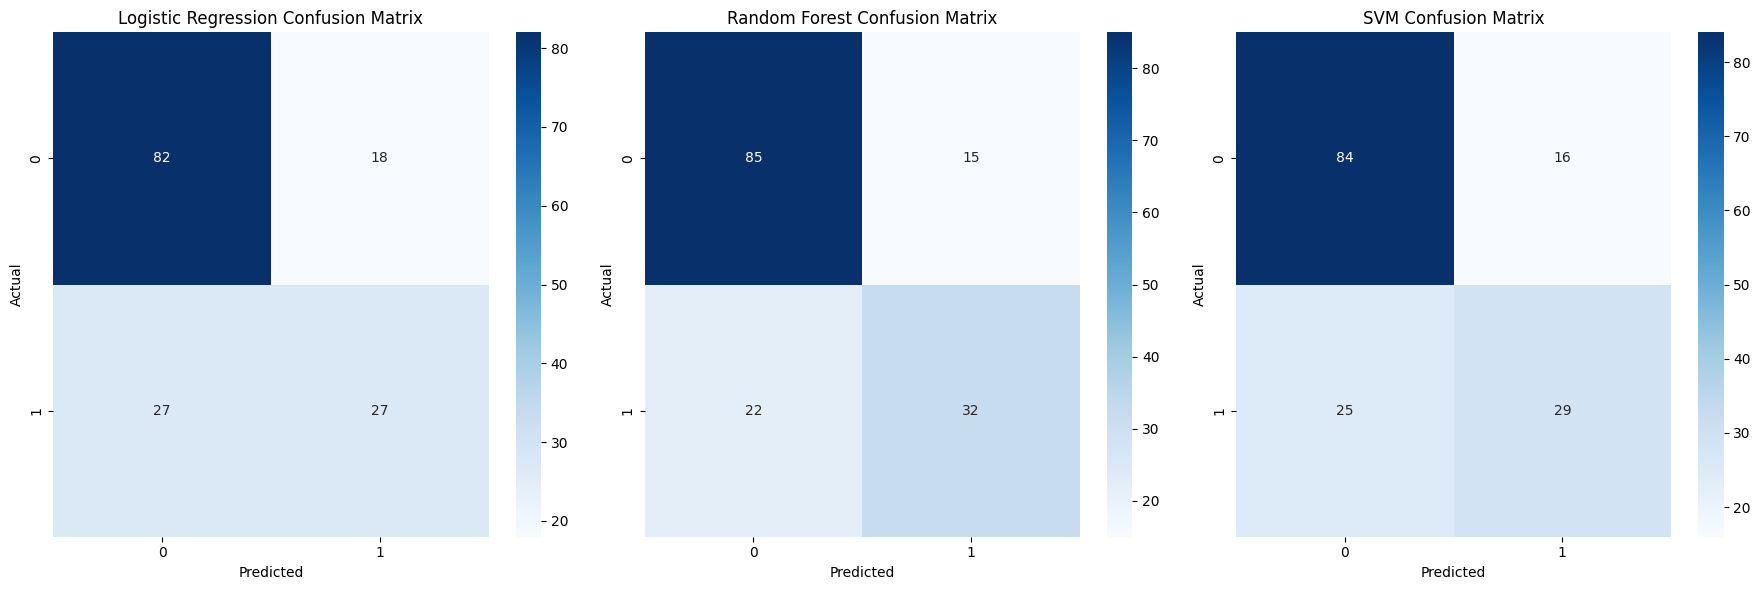

In [21]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, model, preds, title in zip(
    axes,
    [lr, rf, svm],
    [y_pred_lr, y_pred_rf, y_pred_svm],
    ["Logistic Regression", "Random Forest", "SVM"]
):
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{title} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

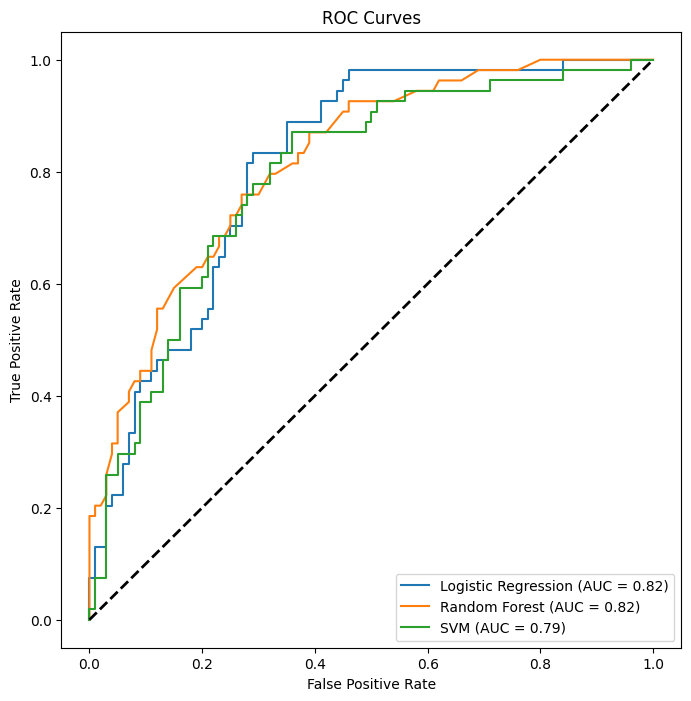

In [23]:
# ROC Curves
plt.figure(figsize=(8, 8))
for model, preds, label in zip(
    [lr, rf, svm],
    [lr.predict_proba(X_test)[:, 1], rf.predict_proba(X_test)[:, 1], svm.predict_proba(X_test)[:, 1]],
    ["Logistic Regression", "Random Forest", "SVM"]
):
    fpr, tpr, _ = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

In [25]:
# Function to calculate metrics for a given model
def calculate_metrics(y_true, y_pred, y_proba=None):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
    }
    if y_proba is not None:  # Calculate AUC if probability predictions are available
        metrics["AUC"] = roc_auc_score(y_true, y_proba)
    else:
        metrics["AUC"] = None
    return metrics

# Logistic Regression
lr_proba = lr.predict_proba(X_test)[:, 1]
lr_metrics = calculate_metrics(y_test, y_pred_lr, y_proba=lr_proba)

# Random Forest
rf_proba = rf.predict_proba(X_test)[:, 1]
rf_metrics = calculate_metrics(y_test, y_pred_rf, y_proba=rf_proba)

# SVM
svm_proba = svm.predict_proba(X_test)[:, 1]  # Use probability estimates for AUC
svm_metrics = calculate_metrics(y_test, y_pred_svm, y_proba=svm_proba)

# Combine results into a DataFrame for summary
import pandas as pd

performance_summary = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"],
    "Logistic Regression": list(lr_metrics.values()),
    "Random Forest": list(rf_metrics.values()),
    "SVM": list(svm_metrics.values())
})

# Display the summary
print("Performance Summary:")
print(performance_summary)


NameError: name 'roc_auc_score' is not defined

# Conclusion

## Key Findings
1. **Logistic Regression:** Simple yet effective for baseline performance.
2. **Random Forest:** Achieved higher recall, making it suitable for imbalanced datasets.
3. **SVM:** Captures complex decision boundaries, but may require tuning for optimal performance.

## Future Work
- Explore additional models like Gradient Boosting or XGBoost.
- Investigate oversampling techniques like SMOTE for better handling of imbalanced classes.
- Perform hyperparameter tuning for each model to maximize performance.
